# Models

## Vision Branch

### Image classification

#### Clip

In [ ]:
!conda install matplotlib -y

In [1]:
from PIL import Image
import requests
import torch
import matplotlib.pyplot as plt
import numpy as np

openai/clip-vit-base-patch32

from transformers import CLIPProcessor, CLIPModel

model = CLIPModel.from_pretrained("openai/clip-vit-large-patch14")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-large-patch14")

/home/sunzid/anaconda3/envs/semanticOSL/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:


image, label = train_data[0]
print(f"Image shape: {image.shape}")

# This doesn't work, as matplotlib expects HXWXC, but PyTorch has (BX)CXHXW
# plt.imshow(image);

# squeeze remove the single dimension, and matplotlib can work with HXW
plt.imshow(image.squeeze());
plt.title(label);


In [15]:
kitchenURL = "https://upload.wikimedia.org/wikipedia/commons/thumb/7/7f/Frankfurter-kueche-vienna.JPG/450px-Frankfurter-kueche-vienna.JPG"
kitchenImg = Image.open(requests.get(kitchenURL, stream=True).raw)

livingRoomURL = "https://upload.wikimedia.org/wikipedia/commons/thumb/2/27/Soviet-era_Estonian_room_in_a_museum.jpg/1024px-Soviet-era_Estonian_room_in_a_museum.jpg"
livingRoomImg = Image.open(requests.get(livingRoomURL, stream=True).raw)

bedRoomURL = "https://upload.wikimedia.org/wikipedia/commons/thumb/6/64/Bedroom_inside_the_Indian_Mound_Cottage_at_Jekyll_Island_2.jpg/1024px-Bedroom_inside_the_Indian_Mound_Cottage_at_Jekyll_Island_2.jpg"
bedRoomImg = Image.open(requests.get(bedRoomURL, stream=True).raw)

bathRoomURL = "https://upload.wikimedia.org/wikipedia/commons/thumb/e/e2/2020-01-09_Media_Tour_Youth_Olympic_Village_Lausanne_%282020_Winter_Youth_Olympics%29_by_Martin_Rulsch_63.jpg/1024px-2020-01-09_Media_Tour_Youth_Olympic_Village_Lausanne_%282020_Winter_Youth_Olympics%29_by_Martin_Rulsch_63.jpg"
bathRoomImg = Image.open(requests.get(bathRoomURL, stream=True).raw)

labels=["kitchen",
        "living room",
        "bed room",
        "bathroom"]


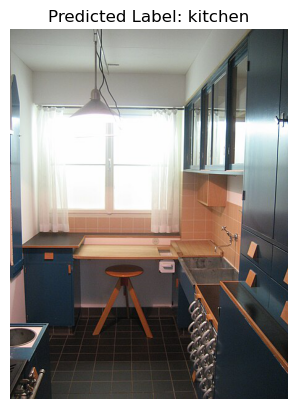

In [30]:
inputs = processor(labels, images=kitchenImg, return_tensors="pt", padding=True)

outputs = model(**inputs)
logits_per_image = outputs.logits_per_image # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1) # we can take the softmax to get the label probabilities

hiProbLabel = labels[torch.argmax(probs).item()]

plt.imshow(np.array(kitchenImg));
plt.axis(False);
plt.title("Predicted Label: " + hiProbLabel);

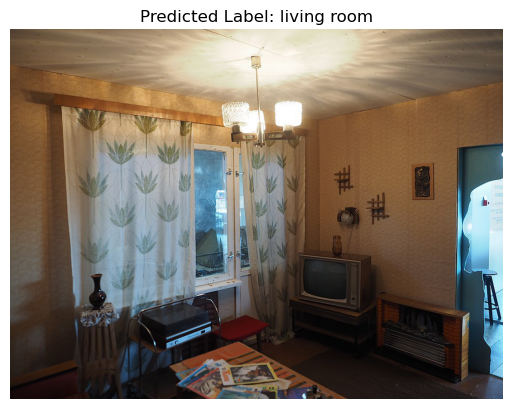

In [31]:
inputs = processor(labels, images=livingRoomImg, return_tensors="pt", padding=True)

outputs = model(**inputs)
logits_per_image = outputs.logits_per_image # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1) # we can take the softmax to get the label probabilities

hiProbLabel = labels[torch.argmax(probs).item()]

plt.imshow(np.array(livingRoomImg));
plt.axis(False);
plt.title("Predicted Label: " + hiProbLabel);

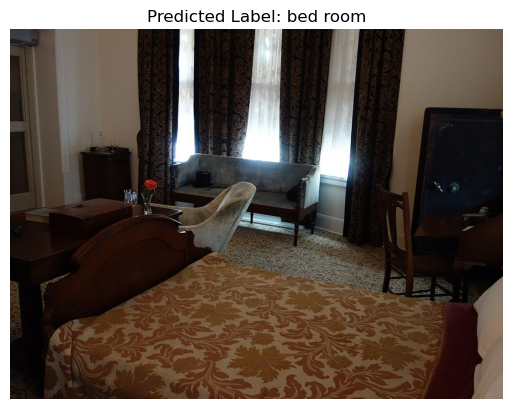

In [32]:
inputs = processor(labels, images=bedRoomImg, return_tensors="pt", padding=True)

outputs = model(**inputs)
logits_per_image = outputs.logits_per_image # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1) # we can take the softmax to get the label probabilities

hiProbLabel = labels[torch.argmax(probs).item()]

plt.imshow(np.array(bedRoomImg));
plt.axis(False);
plt.title("Predicted Label: " + hiProbLabel);

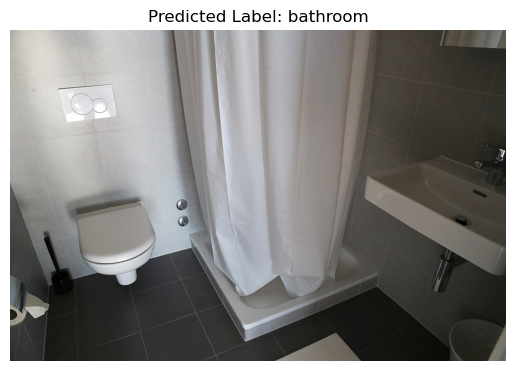

In [33]:
inputs = processor(labels, images=bathRoomImg, return_tensors="pt", padding=True)

outputs = model(**inputs)
logits_per_image = outputs.logits_per_image # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1) # we can take the softmax to get the label probabilities

hiProbLabel = labels[torch.argmax(probs).item()]

plt.imshow(np.array(bathRoomImg));
plt.axis(False);
plt.title("Predicted Label: " + hiProbLabel);

### Segmentation

#### Clipseg

# Sim

## iThor

In [ ]:
# Check conda version
!conda -V

conda 24.9.2


In [ ]:
# Check cuda version
!nvidia-smi

Thu Jan 30 18:00:45 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.120                Driver Version: 550.120        CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 2060        Off |   00000000:01:00.0 Off |                  N/A |
| N/A   41C    P8              1W /   90W |       7MiB /   6144MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
# Install matplotlib
%conda install -c conda-forge matplotlib -y

# Install torch
%pip3 install torch torchvision torchaudio

# Install transformers
%pip install 'transformers[torch]'

In [62]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
import requests

import torch

from transformers import CLIPProcessor, CLIPModel


/home/sunzid/anaconda3/envs/ithor/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
from ai2thor.controller import Controller
controller = Controller()

thor-Linux64-f0825767cd50d69f666c7f282e54abfe58f1e917.zip: [   0%   0.0 s/B]  of 769.MB
thor-Linux64-f0825767cd50d69f666c7f282e54abfe58f1e917.zip: [   0% 129.2 KiB/s]  of 769.MB
thor-Linux64-f0825767cd50d69f666c7f282e54abfe58f1e917.zip: [   0% 194.3 KiB/s]  of 769.MB
thor-Linux64-f0825767cd50d69f666c7f282e54abfe58f1e917.zip: [   0% 157.7 KiB/s]  of 769.MB
thor-Linux64-f0825767cd50d69f666c7f282e54abfe58f1e917.zip: [   0% 169.2 KiB/s]  of 769.MB
thor-Linux64-f0825767cd50d69f666c7f282e54abfe58f1e917.zip: [   0% 198.6 KiB/s]  of 769.MB
thor-Linux64-f0825767cd50d69f666c7f282e54abfe58f1e917.zip: [   0% 174.1 KiB/s]  of 769.MB
thor-Linux64-f0825767cd50d69f666c7f282e54abfe58f1e917.zip: [   0% 215.0 KiB/s]  of 769.MB
thor-Linux64-f0825767cd50d69f666c7f282e54abfe58f1e917.zip: [   0% 208.3 KiB/s]  of 769.MB
thor-Linux64-f0825767cd50d69f666c7f282e54abfe58f1e917.zip: [   0% 233.9 KiB/s]  of 769.MB
thor-Linux64-f0825767cd50d69f666c7f282e54abfe58f1e917.zip: [   0% 262.5 KiB/s]  of 769.MB
thor-Linux64

### Take Action

Movement parameters: MoveAhead, MoveBack, MoveLeft, MoveRight
Rotation parameters: RotateRight, RotateLeft
Camera rotation: LookUp, LookDown
Done: nothing

In [106]:
# Take action with controller.step("MoveBack"), controller.step("MoveLeft"), controller.step("MoveRight"), controller.step("MoveAhead")
event = controller.step("MoveBack")

In [110]:
event = controller.step("MoveAhead")

In [68]:
event = controller.step("MoveLeft")

In [89]:
event = controller.step("MoveRight")

In [99]:
event = controller.step("RotateLeft")

In [108]:
event = controller.step("RotateRight")

### Sense environment

In [30]:
# controller.last_event contains the metadata of the last event
controller.last_event.metadata["agent"]["position"]

{'x': 0.0, 'y': 0.9009992480278015, 'z': 1.5}

#### RGB image

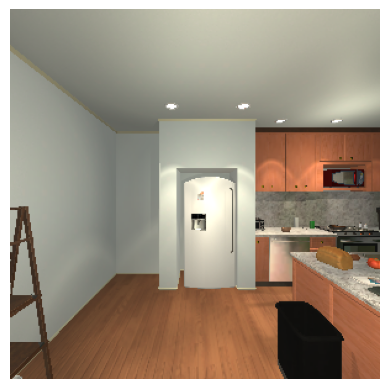

In [55]:
lastFrame = np.array(controller.last_event.frame)
plt.imshow(lastFrame)
plt.axis(False);

### Process Environment

#### Vision branch: object detection

In [64]:
clipModel = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
clipProcessor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

In [111]:
labels=["kitchen",
        "living room",
        "bed room",
        "bathroom"]


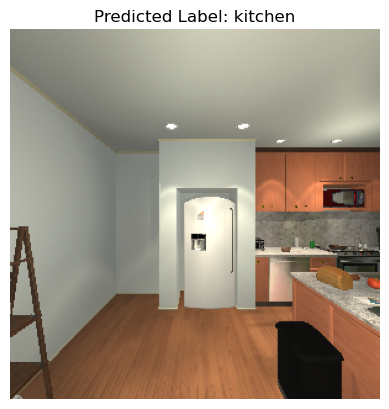

In [114]:
inputs = clipProcessor(labels, images=lastFrame, return_tensors="pt", padding=True)

outputs = clipModel(**inputs)
logits_per_image = outputs.logits_per_image # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1) # we can take the softmax to get the label probabilities

hiProbLabel = labels[torch.argmax(probs).item()]

plt.imshow(lastFrame);
plt.axis(False);
plt.title("Predicted Label: " + hiProbLabel);

#### Vision branch: object segmentation

In [ ]:
%pip install sam2
